### View data

In [1]:
import pandas as pd

df = pd.read_csv('titanic.csv')
df_test = pd.read_csv('titanic_test.csv')
df_full = [df, df_test]

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df_test['Embarked'].mode()

0    S
dtype: object

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


### Explore each column

In [5]:
#Pclass
print(df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean())

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


In [6]:
#Sex
print(df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean())

      Sex  Survived
0  female  0.742038
1    male  0.188908


In [7]:
#FamilySize
for dataset in df_full:
  dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

In [8]:
print(df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean())

   FamilySize  Survived
0           1  0.303538
1           2  0.552795
2           3  0.578431
3           4  0.724138
4           5  0.200000
5           6  0.136364
6           7  0.333333
7           8  0.000000
8          11  0.000000


In [9]:
#isAlone
for dataset in df_full:
  dataset['isAlone'] = 0
  dataset.loc[dataset['FamilySize']==1, 'isAlone'] = 1

In [10]:
print(df[['isAlone', 'Survived']].groupby(['isAlone'], as_index=False).mean())

   isAlone  Survived
0        0  0.505650
1        1  0.303538


In [11]:
#Embarked
for dataset in df_full:
  # mode = dataset['Embarked'].mode()
  dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [12]:
print(df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean())

  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009


In [13]:
#Fare
for dataset in df_full:
  # mean = dataset['Fare'].mean()
  dataset['Fare'] = dataset['Fare'].fillna(0)
  dataset['CategoricalFare'] = pd.qcut(dataset['Fare'], 4)

In [14]:
print(df[['CategoricalFare', 'Survived']].groupby(['CategoricalFare'], as_index=False).mean())

   CategoricalFare  Survived
0   (-0.001, 7.91]  0.197309
1   (7.91, 14.454]  0.303571
2   (14.454, 31.0]  0.454955
3  (31.0, 512.329]  0.581081


In [15]:
#Age
import numpy as np

for dataset in df_full:
    age_avg 	   = dataset['Age'].mean()
    age_std 	   = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)
    dataset['CategoricalAge'] = pd.cut(dataset['Age'], 5)

<ipython-input-15-3e1c2cde1b3d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list


In [16]:
print(df[['CategoricalAge', 'Survived']].groupby(['CategoricalAge'], as_index=False).mean())

  CategoricalAge  Survived
0  (-0.08, 16.0]  0.513274
1   (16.0, 32.0]  0.344444
2   (32.0, 48.0]  0.395161
3   (48.0, 64.0]  0.434783
4   (64.0, 80.0]  0.090909


In [17]:
#Name
import re
def get_title(name):
	title_search = re.search(' ([A-Za-z]+)\.', name)
	if title_search:
		return title_search.group(1)
	return ""

for dataset in df_full:
    dataset['Title'] = dataset['Name'].apply(get_title)

print(pd.crosstab(df['Title'], df['Sex']))

Sex       female  male
Title                 
Capt           0     1
Col            0     2
Countess       1     0
Don            0     1
Dr             1     6
Jonkheer       0     1
Lady           1     0
Major          0     2
Master         0    40
Miss         182     0
Mlle           2     0
Mme            1     0
Mr             0   517
Mrs          125     0
Ms             1     0
Rev            0     6
Sir            0     1


In [18]:
for dataset in df_full:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

print (df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean())

    Title  Survived
0  Master  0.575000
1    Miss  0.702703
2      Mr  0.156673
3     Mrs  0.793651
4    Rare  0.347826


In [19]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,isAlone,CategoricalFare,CategoricalAge,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,2,0,"(-0.001, 7.91]","(16.0, 32.0]",Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,2,0,"(31.0, 512.329]","(32.0, 48.0]",Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,"(7.91, 14.454]","(16.0, 32.0]",Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,2,0,"(31.0, 512.329]","(32.0, 48.0]",Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,1,1,"(7.91, 14.454]","(32.0, 48.0]",Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,NaN,S,1,1,"(7.91, 14.454]","(16.0, 32.0]",Rare
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,B42,S,1,1,"(14.454, 31.0]","(16.0, 32.0]",Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,17,1,2,W./C. 6607,23.4500,NaN,S,4,0,"(14.454, 31.0]","(16.0, 32.0]",Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C148,C,1,1,"(14.454, 31.0]","(16.0, 32.0]",Mr


In [20]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,isAlone,CategoricalFare,CategoricalAge,Title
0,892,3,"Kelly, Mr. James",male,34,0,0,330911,7.8292,NaN,Q,1,1,"(-0.001, 7.896]","(30.4, 45.6]",Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7.0000,NaN,S,2,0,"(-0.001, 7.896]","(45.6, 60.8]",Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9.6875,NaN,Q,1,1,"(7.896, 14.454]","(60.8, 76.0]",Mr
3,895,3,"Wirz, Mr. Albert",male,27,0,0,315154,8.6625,NaN,S,1,1,"(7.896, 14.454]","(15.2, 30.4]",Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,3101298,12.2875,NaN,S,3,0,"(7.896, 14.454]","(15.2, 30.4]",Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,35,0,0,A.5. 3236,8.0500,NaN,S,1,1,"(7.896, 14.454]","(30.4, 45.6]",Mr
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39,0,0,PC 17758,108.9000,C105,C,1,1,"(31.472, 512.329]","(30.4, 45.6]",Rare
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1,1,"(-0.001, 7.896]","(30.4, 45.6]",Mr
416,1308,3,"Ware, Mr. Frederick",male,37,0,0,359309,8.0500,NaN,S,1,1,"(7.896, 14.454]","(30.4, 45.6]",Mr


In [21]:
S  C 
1  0 
0  1 
0  0 

SyntaxError: invalid syntax (<ipython-input-21-396988996faa>, line 1)

In [25]:
for dataset in df_full:
    # Mapping Sex
    dataset['Sex'] = dataset['Sex'].map( {'female': 0, 'male': 1} )
    
    # Mapping titles
    title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
    
    # Mapping Embarked
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} )
    
    # Mapping Fare
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] 						                  = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] 							                    = 3
    dataset['Fare'] = dataset['Fare'].astype(int)
    
    # Mapping Age
    dataset.loc[ dataset['Age'] <= 16, 'Age']        = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']                           = 4

# Feature Selection
drop_elements = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp',\
                 'Parch', 'FamilySize']
df = df.drop(drop_elements, axis = 1)
df = df.drop(['CategoricalAge', 'CategoricalFare'], axis = 1)

df_test  = df_test.drop(drop_elements, axis = 1)
df_test = df_test.drop(['CategoricalAge', 'CategoricalFare'], axis = 1)

print(df.head(10))

train = df.values
test  = df_test.values

   Survived  Pclass  Sex  Age  Fare  Embarked  isAlone  Title
0         0       3    1    1     0         0        0      1
1         1       1    0    2     3         1        0      3
2         1       3    0    1     1         0        1      2
3         1       1    0    2     3         0        0      3
4         0       3    1    2     1         0        1      1
5         0       3    1    1     1         2        1      1
6         0       1    1    3     3         0        1      1
7         0       3    1    0     2         0        0      4
8         1       3    0    1     1         0        0      3
9         1       2    0    0     2         1        0      3


In [26]:
np.nan in df

False

In [27]:
df.to_csv('df.csv', index=False)

### Train and evaluate

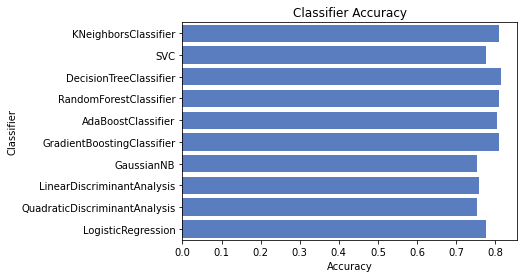

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

classifiers = [
    KNeighborsClassifier(3),
    SVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
	  AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression()]

log_cols = ["Classifier", "Accuracy"]
log 	 = pd.DataFrame(columns=log_cols)

# sss = StratifiedShuffleSplit(n_splits=10, test_size=0.1, random_state=0)

X = df.iloc[:, 1:]
y = df.iloc[:, 0]

acc_dict = {}

# for train_index, test_index in sss.split(X, y):
# 	X_train, X_test = X[train_index], X[test_index]
# 	y_train, y_test = y[train_index], y[test_index]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)
	
for clf in classifiers:
	name = clf.__class__.__name__
	clf.fit(X_train, y_train)
	train_predictions = clf.predict(X_test)
	acc = accuracy_score(y_test, train_predictions)
	if name in acc_dict:
		acc_dict[name] += acc
	else:
		acc_dict[name] = acc

for clf in acc_dict:
	acc_dict[clf] = acc_dict[clf]
	log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
	log = log.append(log_entry)

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

In [29]:
np.isnan(df.any())

Survived    False
Pclass      False
Sex         False
Age         False
Fare        False
Embarked    False
isAlone     False
Title       False
dtype: bool

### Hyperparameter Tuning

In [117]:
from sklearn.model_selection import GridSearchCV
import numpy as np

knn = KNeighborsClassifier()

param_grid = {'n_neighbors':np.arange(5,60), 'weights':['uniform', 'distance']}
gscv = GridSearchCV(knn, param_grid=param_grid, cv=5, scoring='roc_auc')

gscv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55,
       56, 57, 58, 59]),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [118]:
gscv.best_params_

{'n_neighbors': 15, 'weights': 'uniform'}

In [142]:
knn = KNeighborsClassifier(n_neighbors= 15, weights= 'uniform')
knn.fit(X, y)
df_test = df_test.fillna(0)
y_pred = knn.predict(df_test)

In [140]:
df_test = df_test.drop(['prediction'], axis = 1)

In [131]:
DTC = DecisionTreeClassifier()
DTC.fit(X, y)
df_test = df_test.fillna(0)
y_pred = DTC.predict(df_test)

In [132]:
df_test

,Pclass,Sex,Age,Fare,Embarked,isAlone,Title
0,3,1,2,0,2,1,1
1,3,0,2,0,0,0,3
2,2,1,3,1,2,1,1
3,3,1,1,1,0,1,1
4,3,0,1,1,0,0,3
...,...,...,...,...,...,...,...
413,3,1,1,1,0,1,1
414,1,0,2,3,1,1,5
415,3,1,2,0,0,1,1
416,3,1,1,1,0,1,1


In [133]:
df_test['prediction'] = y_pred

In [134]:
df_test

,Pclass,Sex,Age,Fare,Embarked,isAlone,Title,prediction
0,3,1,2,0,2,1,1,0
1,3,0,2,0,0,0,3,0
2,2,1,3,1,2,1,1,0
3,3,1,1,1,0,1,1,0
4,3,0,1,1,0,0,3,1
...,...,...,...,...,...,...,...,...
413,3,1,1,1,0,1,1,0
414,1,0,2,3,1,1,5,1
415,3,1,2,0,0,1,1,0
416,3,1,1,1,0,1,1,0


### Create Submission file

In [135]:
df_test_1 = pd.read_csv('titanic_test.csv')
df_test_1

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [136]:
submission = pd.DataFrame(df_test_1['PassengerId'])
submission

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [137]:
submission['survived'] = df_test['prediction']
submission

,PassengerId,survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [138]:
submission.to_csv('submissionDTC.csv', index=False)

In [30]:
df_test = pd.read_csv('pendapatan_test.csv')

In [31]:
df_test 

,id,Umur,Kelas Pekerja,Berat Akhir,Pendidikan,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu
0,28794,31,Pemerintah Provinsi,207301,SMA,9,Menikah,Pemuka Agama,Perempuan,0.0,0.0,40.0
1,28795,34,Wiraswasta,324254,SMA,9,Menikah,Mesin Inspeksi,Laki2,0.0,0.0,40.0
2,28796,58,Wiraswasta,27385,SMA,9,Menikah,Ekesekutif Managerial,Laki2,0.0,0.0,60.0
3,28797,49,Wiraswasta,723746,SMA,9,Menikah,Perbaikan Kerajinan,Laki2,0.0,0.0,43.0
4,28798,60,Wiraswasta,194980,SMA,9,Berpisah,Pemuka Agama,Perempuan,0.0,0.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9594,38388,54,Wiraswasta,297551,Pendidikan Tinggi,10,Menikah,Perbaikan Kerajinan,Laki2,102172000.0,0.0,40.0
9595,38389,33,Wiraswasta,236396,Sarjana,13,Menikah,Ekesekutif Managerial,Laki2,210336000.0,0.0,55.0
9596,38390,24,Wiraswasta,83774,SMA,9,Menikah,Servis Lainnya,Laki2,40390000.0,0.0,45.0
9597,38391,34,Wiraswasta,340458,SMA,9,Cerai,Mesin Inspeksi,Perempuan,0.0,0.0,40.0
